In [1]:
# load helper functions for uncertainity detection
import helper
#set default settings for the notebook
import warnings
warnings.filterwarnings('ignore')

In [12]:
#set file name
file = "traffic_fines"
file_result = "traffic_fines_prefix_agg_xgb"

In [13]:
# load event data in dataframe and convert to log 
df = helper.load_data(file)
log = helper.convert_df_to_log(df)

In [14]:
#load freq variants and calculate threshold prefix length
variants, variants_count = helper.get_variants_dict(log)
threshold_prefix, freq_variants = helper.get_threshold_prefix(df,variants_count)

Threshold Prefix Length: 5


In [15]:
#test
data = helper.get_test_data_segment_analysis(threshold_prefix,file_result,df)

Calculating Relative Error for prefixes of length 2 3
Calculating Relative Error for prefixes of length 3 4
Calculating Relative Error for prefixes of length 4 5


In [38]:
#for traffic_fines
gr = data.groupby('Case ID')
gr.get_group('A29416')

,Case ID,Activity_x,Activity_y,relative_error_x,relative_error_y,rae
4,A29416,Send Fine,Insert Fine Notification,0.510268,0.243464,0.24
4,A29416,Insert Fine Notification,Add penalty,0.243464,0.361294,-0.11
4,A29416,Add penalty,Send for Credit Collection,0.361294,0.045587,0.27


In [49]:
#for bpic
gr = data.groupby('Case ID')
gr.get_group('declaration 128839')

,Case ID,Activity_x,Activity_y,relative_error_x,relative_error_y,rae
0,declaration 128839,Declaration APPROVED by ADMINISTRATION,Declaration APPROVED by BUDGET OWNER,0.314278,1.347457,-0.71
0,declaration 128839,Declaration APPROVED by BUDGET OWNER,Declaration FINAL_APPROVED by SUPERVISOR,1.347457,1.401497,-0.05
0,declaration 128839,Declaration FINAL_APPROVED by SUPERVISOR,Request Payment,1.401497,1.092280,0.27
0,declaration 128839,Request Payment,Payment Handled,1.092280,0.003183,0.74


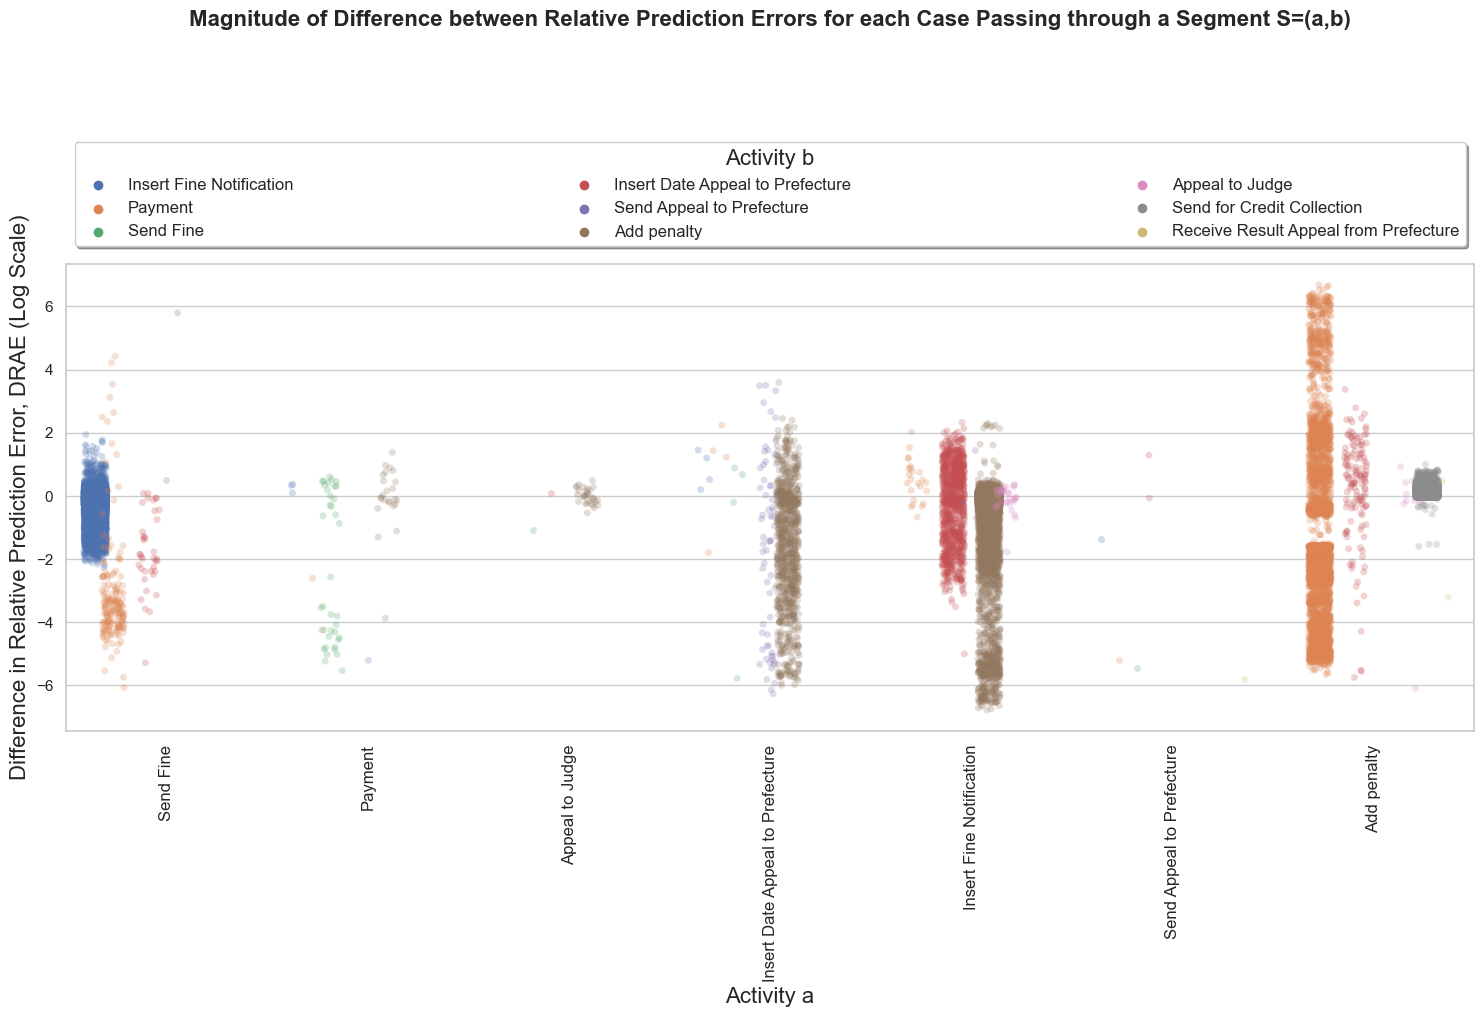

In [16]:
#create scatter plot for getting overview of uncertainity in segments of the event log
helper.create_segment_uncertainity_plot(data,file_result,"test")

In [48]:
#detect subset of segments, i.e., uncertain segments with inter-case dynamics
uncertain_segments,size_df,seg_df = helper.get_uncertain_most_segments(data)
uncertain_segments

[('Declaration APPROVED by ADMINISTRATION',
  'Declaration FINAL_APPROVED by SUPERVISOR'),
 ('Declaration FINAL_APPROVED by SUPERVISOR', 'Request Payment'),
 ('Request Payment', 'Payment Handled')]

(29, 3)
(28, 3)
(38, 3)
(28, 3)
(24, 3)
(35, 3)
(10, 3)
(29, 3)
(28, 3)
(28, 3)
(24, 3)
Number of events in Segment: (6, 2)
(15, 3)
(35, 3)
(24, 3)
(42, 3)
(42, 3)
(42, 3)
(19, 3)
(22, 3)
(29, 3)
(24, 3)
(19, 3)
(28, 3)
(22, 3)
(24, 3)
(22, 3)
(35, 3)
(24, 3)
(28, 3)
(10, 3)
(19, 3)
(22, 3)
(12, 3)
(13, 3)
(28, 3)
(13, 3)
(28, 3)
(24, 3)
(19, 3)
(22, 3)
(22, 3)
(13, 3)
(29, 3)
(29, 3)
(35, 3)
(35, 3)
(35, 3)
(28, 3)
(29, 3)
(24, 3)
(28, 3)
(28, 3)
(19, 3)
(24, 3)
(28, 3)
(28, 3)
(19, 3)
(12, 3)
(12, 3)
(13, 3)
Number of events in Segment: (12, 2)


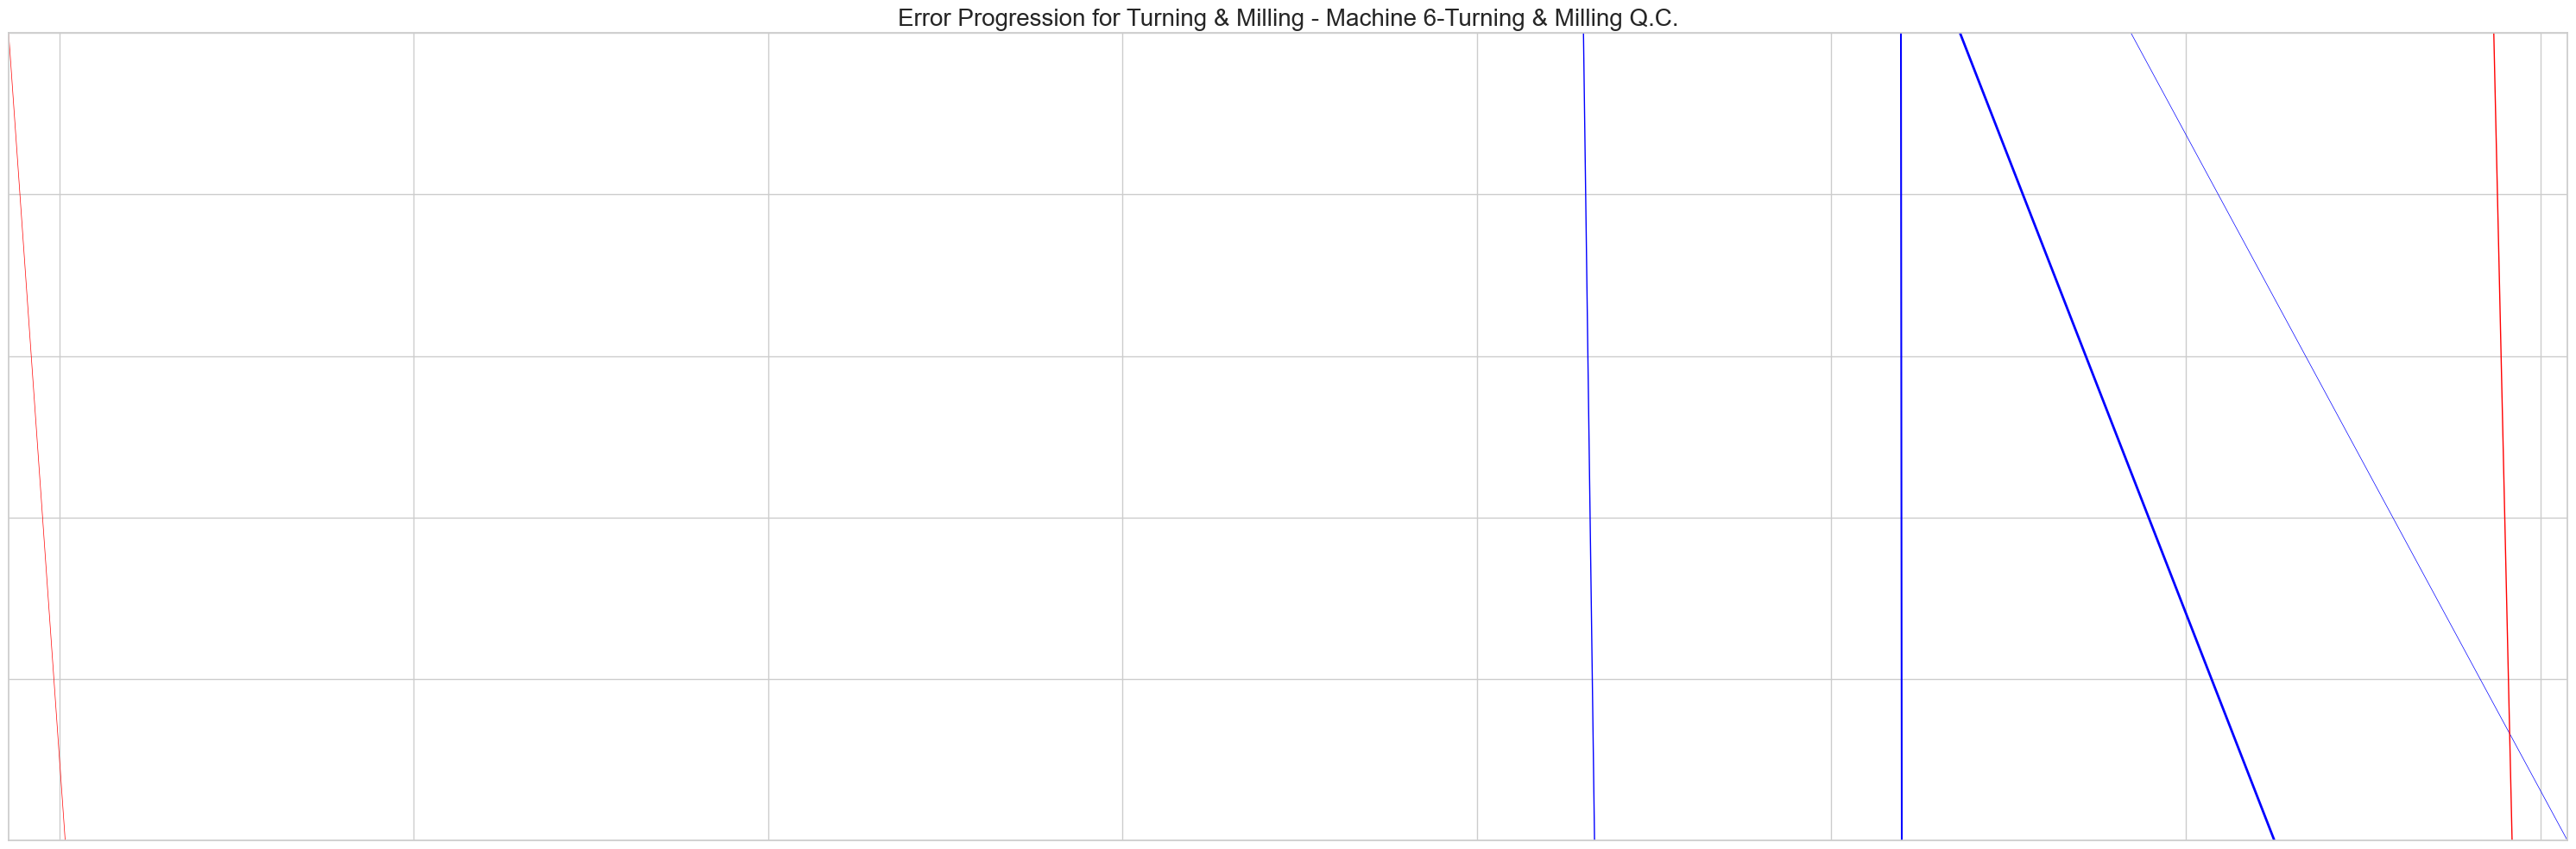

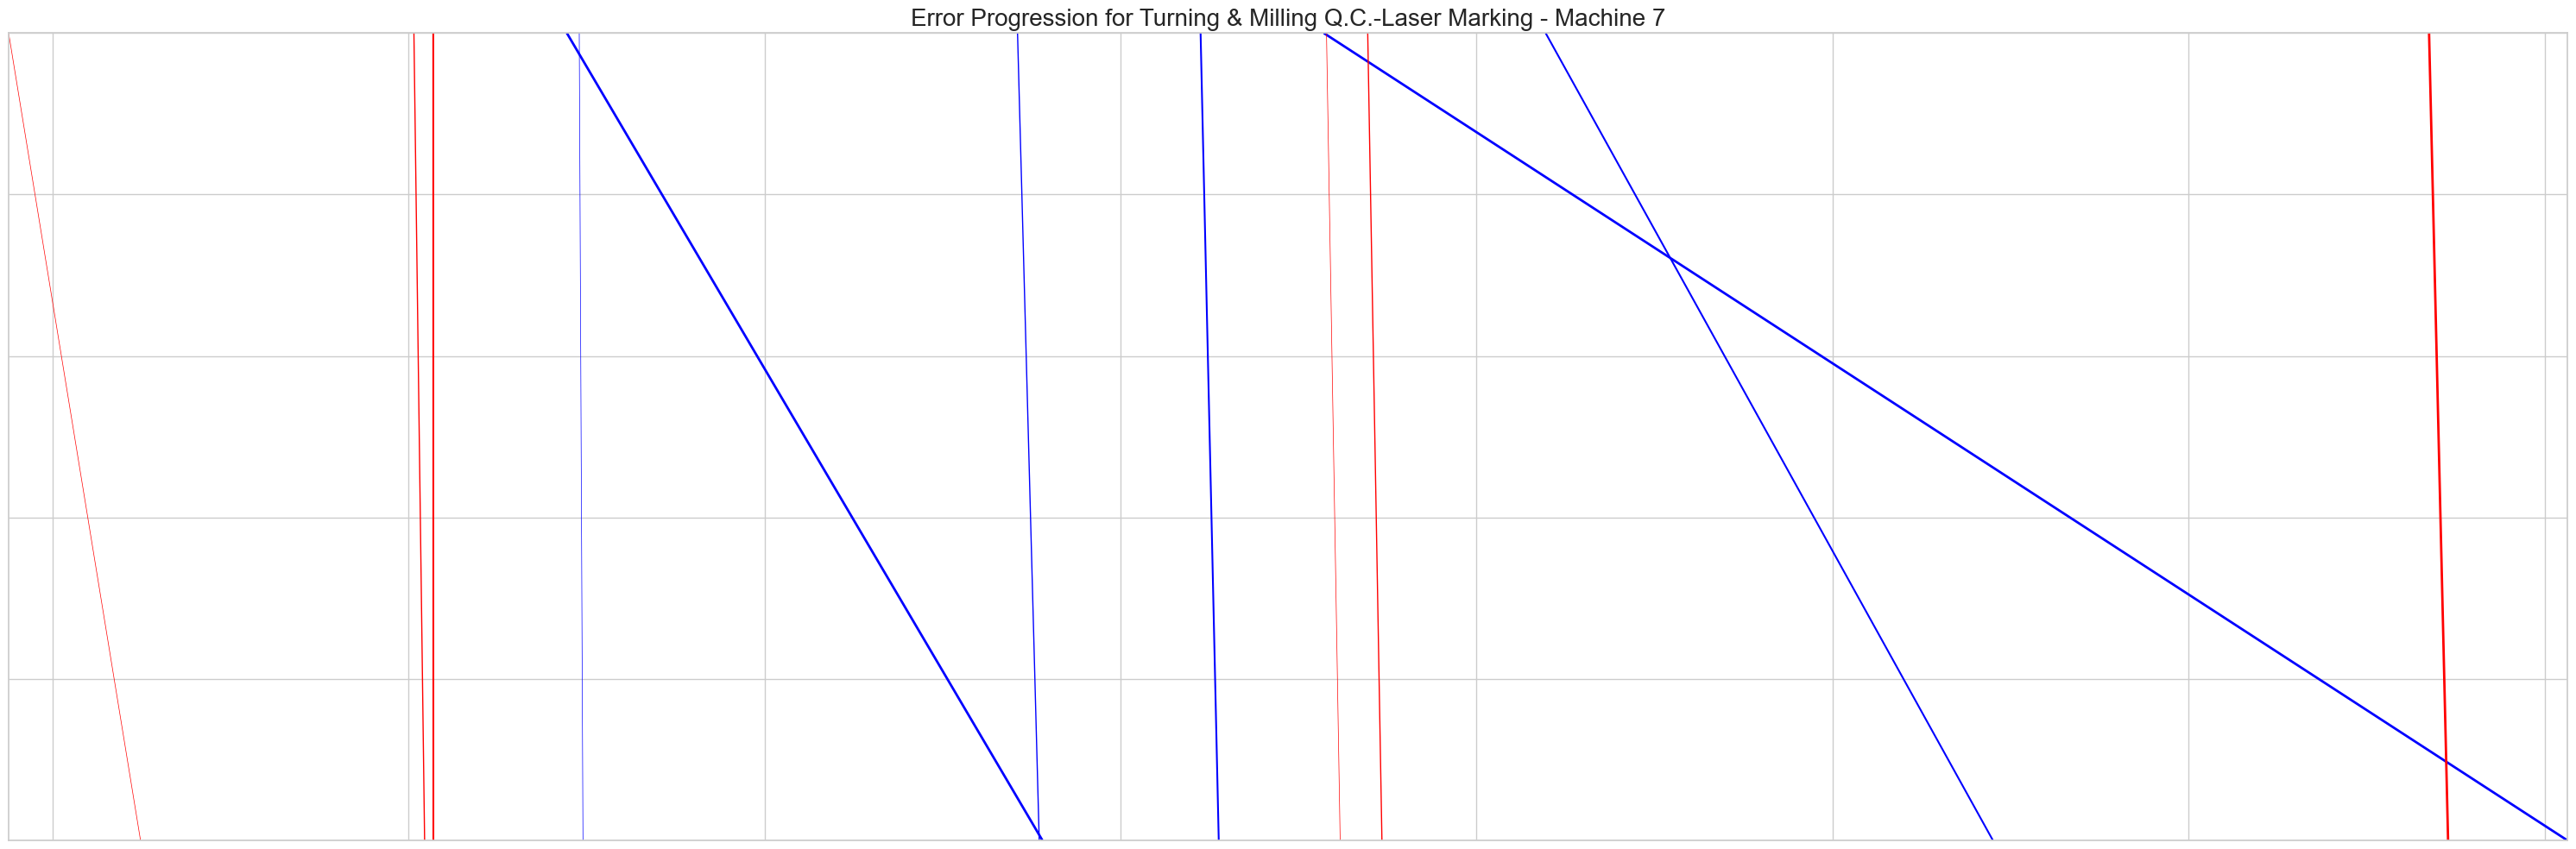

In [15]:
#create performance spectrum with error progression for inspecting patterns related to intre-case dynamics
for a1,a2 in uncertain_segments:
    if(a1!=a2):
        fq= helper.get_relevant_variants(a1,a2,freq_variants)
        all_cases = []
        final_colormap = {}
        for var,p1,p2 in fq:
            relevant_cases = helper.get_relevant_cases(df, [var])
            df_a1, cases_p1, rae = helper.get_relative_error_test(relevant_cases,p1,p2,file_result)
            cases, colormap = helper.build_colormap(df_a1, cases_p1,rae)
            all_cases+=cases
            final_colormap.update(colormap)
    #     len(all_cases), len(final_colormap)
        data = df[df["Case ID"].isin(all_cases)]
#         print(data.head())
        helper.plot_error_progression(data,a1,a2,all_cases,final_colormap,file_result)